In [4]:
import torch.nn as nn
import torch

In [5]:
n, d, m = 3, 5, 7
embedding = nn.Embedding(n, d, max_norm=True)

In [29]:
# an Embedding module containing 10 tensors of size 3
embedding = nn.Embedding(13, 2)
# a batch of 2 samples of 4 indices each
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
# xdoctest: +IGNORE_WANT("non-deterministic")
sample_embedding = embedding(input)
sample_embedding

tensor([[[ 0.1139,  2.2195],
         [-0.1970, -0.2280],
         [-0.2013,  0.6679],
         [ 0.3171, -0.6718]],

        [[-0.2013,  0.6679],
         [ 1.4409, -0.2387],
         [-0.1970, -0.2280],
         [ 0.4108, -0.3938]]], grad_fn=<EmbeddingBackward0>)

In [30]:
sample_embedding[0]

tensor([[ 0.1139,  2.2195],
        [-0.1970, -0.2280],
        [-0.2013,  0.6679],
        [ 0.3171, -0.6718]], grad_fn=<SelectBackward0>)

In [25]:
import matplotlib.pyplot as plt

0.01961974985897541 -0.17922884225845337
-0.024420173838734627 0.7123748660087585
0.5009524822235107 1.5144315958023071
-0.40828296542167664 -0.9076639413833618
0.5009524822235107 1.5144315958023071
-1.3485145568847656 -0.5180916786193848
-0.024420173838734627 0.7123748660087585
0.4019373655319214 0.20307689905166626


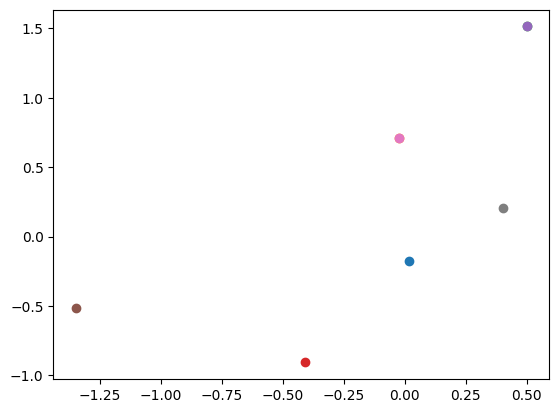

In [26]:
x = []
y = []
for sample in sample_embedding:
    for i, j in sample:
        print(i.item(), j.item())
        plt.scatter(i.item(), j.item())

In [41]:
import torch

# Sample attention mask (a 2D tensor)
att_mask = torch.tensor([[1, 0, 1],
                        [0, 1, 0],
                        [1, 1, 0]])

# Step 1: Create a binary mask
binary_mask = att_mask > 0
print(binary_mask.size())
binary_mask

torch.Size([3, 3])


tensor([[ True, False,  True],
        [False,  True, False],
        [ True,  True, False]])

In [42]:
# Step 2: Add a dimension along the first axis
binary_mask = binary_mask.unsqueeze(1)
print(binary_mask.size())

binary_mask

torch.Size([3, 1, 3])


tensor([[[ True, False,  True]],

        [[False,  True, False]],

        [[ True,  True, False]]])

In [43]:
att_mask.size()

torch.Size([3, 3])

In [44]:
# Step 3: Repeat the binary mask along the second axis
binary_mask = binary_mask.repeat(1, att_mask.size(1), 1)
print(binary_mask.size())

binary_mask

torch.Size([3, 3, 3])


tensor([[[ True, False,  True],
         [ True, False,  True],
         [ True, False,  True]],

        [[False,  True, False],
         [False,  True, False],
         [False,  True, False]],

        [[ True,  True, False],
         [ True,  True, False],
         [ True,  True, False]]])

In [45]:
# Step 4: Add another dimension along the first axis
binary_mask = binary_mask.unsqueeze(1)

# Print the resulting binary mask
print(binary_mask)

tensor([[[[ True, False,  True],
          [ True, False,  True],
          [ True, False,  True]]],


        [[[False,  True, False],
          [False,  True, False],
          [False,  True, False]]],


        [[[ True,  True, False],
          [ True,  True, False],
          [ True,  True, False]]]])


In [56]:
binary_mask.shape

torch.Size([3, 1, 3, 3])

In [55]:
import torch
import torch.nn.functional as F

# Create a tensor with logits for two items in a batch and three classes
logits = torch.tensor([[2.0, 1.0, 0.1], [1.0, 2.0, 0.1]])

# Apply softmax along the last dimension (dim=-1)
weights = F.softmax(logits, dim=-1)

# Print the resulting softmax probabilities
print(weights)


tensor([[0.6590, 0.2424, 0.0986],
        [0.2424, 0.6590, 0.0986]])


In [83]:
import torch

# Create a sample tensor "k" with shape (batch_size, key_dim, num_keys)
import torch

# Create a sample tensor "k" with shape (batch_size, key_dim, num_keys)
k = torch.tensor([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                 [[10, 11, 12], [13, 14, 15], [16, 17, 18]]])
print(k.shape)

# Transpose the tensor by swapping the |last two dimensions
k_transposed = k.transpose(1, 2)

# Print the original and transposed tensors
print("Original tensor (k):")
print(k.shape)

print(k)

print("Transposed tensor (k_transposed):")
print(k_transposed)


torch.Size([2, 3, 3])
Original tensor (k):
torch.Size([2, 3, 3])
tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]])
Transposed tensor (k_transposed):
tensor([[[ 1,  4,  7],
         [ 2,  5,  8],
         [ 3,  6,  9]],

        [[10, 13, 16],
         [11, 14, 17],
         [12, 15, 18]]])
